In [68]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import numpy as np

In [69]:
path_to_xlsx = 'D:\\17.5.24\\DataFiles\\Full_Image_List_6.5.24\\all_elements.xlsx'

In [70]:
df = pd.read_excel(path_to_xlsx)

In [71]:
path_to_xlsx1 = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_all_ck_ucks.xlsx'

In [72]:
df1 = pd.read_excel(path_to_xlsx1)

In [78]:
df1

,Unnamed: 0,images,label,uck,level
0,0,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00113,MTK_Lunar Eclipse_Group_01,0
1,1,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00113,MTK_Lunar Eclipse_Group_01,0
2,2,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00113,MTK_Lunar Eclipse_Group_01,0
3,3,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00113,MTK_Lunar Eclipse_Group_01,0
4,4,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00113,MTK_Lunar Eclipse_Group_01,0
...,...,...,...,...,...
216961,255197,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01573,MVK_Diagrams,0
216962,255198,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01604,MVK_Diagrams,0
216963,255199,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01604,MVK_Diagrams,0
216964,255200,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01607,MTK_Mercury Orbit_Group_01,0


In [73]:
# Filter df for images with 'CK_Armillary Sphere' keyword
armillary_images = df[df['keywords'].apply(lambda x: 'CK_Armillary Sphere' in x)]['images'].unique()

In [74]:
# Step 2: Create armillary_years DataFrame with images and their years
armillary_years = df[df['images'].isin(armillary_images)][['images', 'year']].drop_duplicates()

In [75]:
armillary_years

,images,year
51,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1494
324,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1508
385,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1513
549,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1516
933,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1519
...,...,...
20865,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1555
21056,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1556
21057,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1556
21101,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1582


In [81]:
# Step 1: Filter df1 for images with uck value 'Structure of the Cosmos'
cosmos_images = df1[df1['uck'] == 'Structure of the cosmos']['images'].unique()

# Step 2: Merge cosmos_images with df to get corresponding years
cosmos_years = pd.merge(df[df['images'].isin(cosmos_images)], df1, on='images', how='inner')[['images', 'year']].drop_duplicates()

In [82]:
cosmos_years

,images,year
0,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1561
23,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1478
31,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1480
39,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1486
47,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1489
...,...,...
3735,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1599
3743,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1556
3753,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1582
3762,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1582


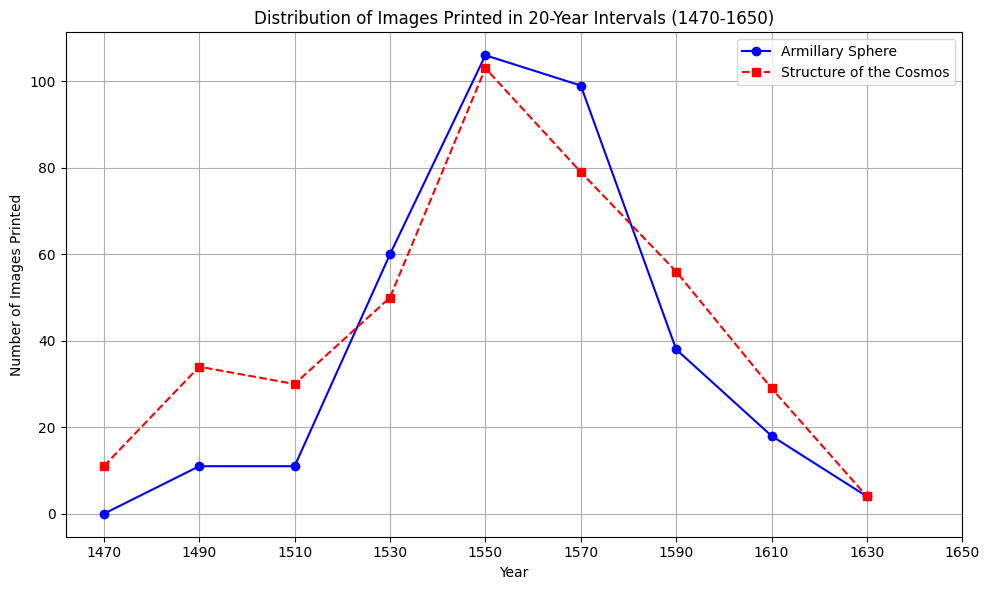

In [83]:
# Combine armillary_years and cosmos_years into one DataFrame
combined_years = pd.concat([armillary_years, cosmos_years], ignore_index=True)

# Define 20-year intervals from 1470 to 1650
year_intervals = np.arange(1470, 1660, 20)

# Initialize counts for each category
armillary_counts = np.zeros(len(year_intervals) - 1)
cosmos_counts = np.zeros(len(year_intervals) - 1)

# Count images in each interval for armillary_years
armillary_counts, _ = np.histogram(armillary_years['year'], bins=year_intervals)

# Count images in each interval for cosmos_years
cosmos_counts, _ = np.histogram(cosmos_years['year'], bins=year_intervals)

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(year_intervals[:-1], armillary_counts, marker='o', linestyle='-', color='b', label='Armillary Sphere')
plt.plot(year_intervals[:-1], cosmos_counts, marker='s', linestyle='--', color='r', label='Structure of the Cosmos')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Images Printed')
plt.title('Distribution of Images Printed in 20-Year Intervals (1470-1650)')
plt.xticks(year_intervals)
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()